In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# let's also get a network from the folder "data"
a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r")
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['Nippon', 'Light', 'Metal', 'Company', 'Limited,Novelis', 'Inc.']
['Nippon', 'Light', 'Metal', 'Company', 'Limited,Honda', 'Motor', 'Co.', 'Ltd.']
['Novelis', 'Inc.,Honda', 'Motor', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Takata', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Nifco', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Keihin', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Illinois', 'Tool', 'Works', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Tokai', 'Rubber', 'Industries', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Honda', 'Access', 'Corp.']
['Honda', 'Motor', 'Co.', 'Ltd.,NSK', 'LTD.']
['Honda', 'Motor', 'Co.', 'Ltd.,Saga', 'Tekkohsho', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Nissin', 'Kogyo', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Bridgestone', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Gentest', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Denso', 'Corporation']
['Toyota', 'Jidosha', 'Kabushiki', 'Kaisha,MEC', 'International', 'Co.', 'Ltd.']
['Toyota', 

In [3]:
# what's the problem??!!
# remember sometime the you need to change the encoder

a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r",encoding='latin1')
for i in a:
    n=i.strip().split()
    print (n)
a.close()

['Nippon', 'Light', 'Metal', 'Company', 'Limited,Novelis', 'Inc.']
['Nippon', 'Light', 'Metal', 'Company', 'Limited,Honda', 'Motor', 'Co.', 'Ltd.']
['Novelis', 'Inc.,Honda', 'Motor', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Takata', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Nifco', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Keihin', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Illinois', 'Tool', 'Works', 'Inc.']
['Honda', 'Motor', 'Co.', 'Ltd.,Tokai', 'Rubber', 'Industries', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Honda', 'Access', 'Corp.']
['Honda', 'Motor', 'Co.', 'Ltd.,NSK', 'LTD.']
['Honda', 'Motor', 'Co.', 'Ltd.,Saga', 'Tekkohsho', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Nissin', 'Kogyo', 'Co.', 'Ltd.']
['Honda', 'Motor', 'Co.', 'Ltd.,Bridgestone', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Gentest', 'Corporation']
['Honda', 'Motor', 'Co.', 'Ltd.,Denso', 'Corporation']
['Toyota', 'Jidosha', 'Kabushiki', 'Kaisha,MEC', 'International', 'Co.', 'Ltd.']
['Toyota', 

In [4]:
G=nx.Graph()
c=0
a=open("data/USPTO_2012_5_proj_edgelist_NEW.csv","r",encoding='latin1')
for i in a:
    n=i.strip().split(',')
    if c>3:
        G.add_edge(n[0],n[1])
    c+=1
a.close()

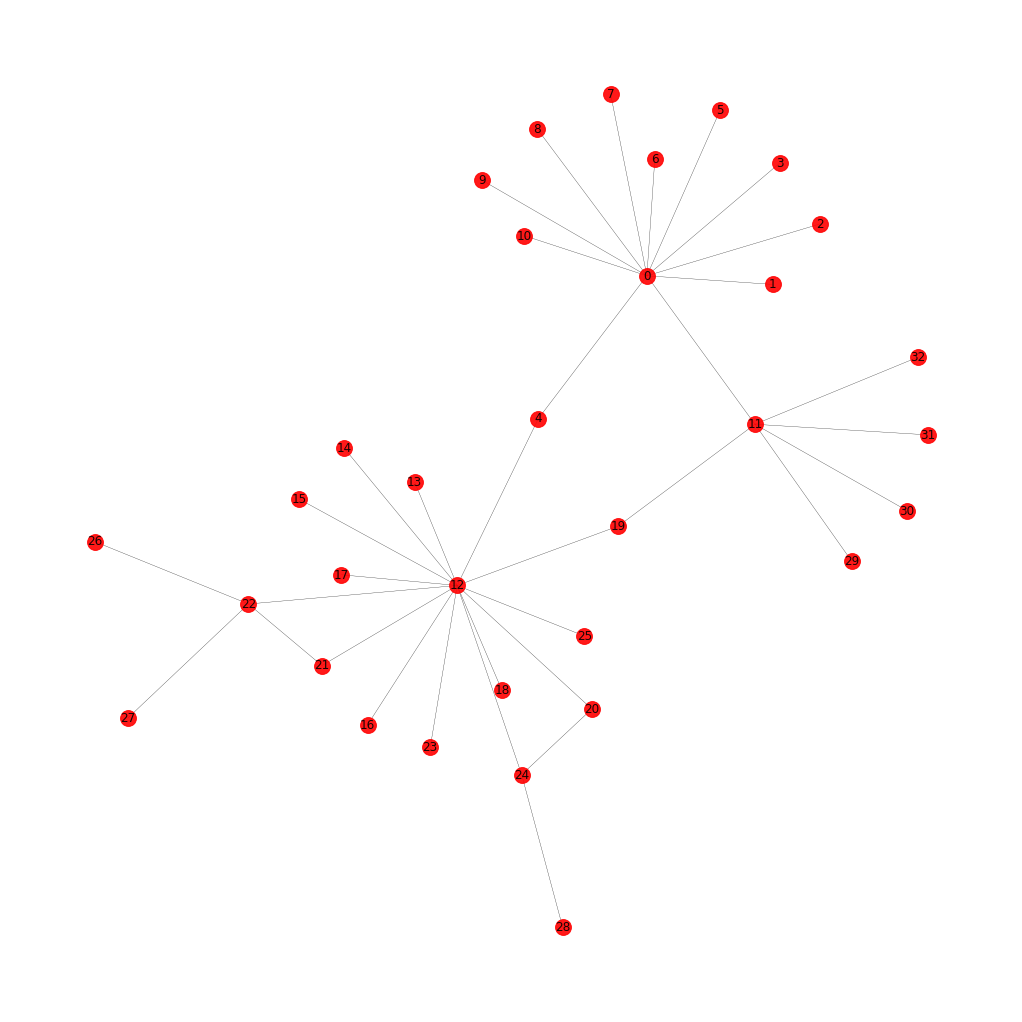

In [5]:
ids_label={} # this dictionary is needed to show the node ids
counter=0
for i in G.nodes():
    ids_label[i]=counter
    counter+=1

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Black"
        ,node_color="Red",labels=ids_label,font_size=12)

# Degree centrality

In [6]:
# how do we get the list of degree for each node ordered from the highest to the lowest?

degree=[]  # list of degree
for i in G.nodes():
        degree.append([G.degree(i),i])   # we put in the list a list of two values, the degree and id of each node
        
        
degree=sorted(degree,reverse=True) # we sort the list using the first element of each list (the degree)

In [7]:
# let's print the top 10
for i in range(10):
    print ("Rank = ",i+1,"Degree = ", degree[i][0], "Node id = ",degree[i][1])

Rank =  1 Degree =  14 Node id =  Toyota Jidosha Kabushiki Kaisha
Rank =  2 Degree =  11 Node id =  Honda Motor Co. Ltd.
Rank =  3 Degree =  6 Node id =  Denso Corporation
Rank =  4 Degree =  4 Node id =  AISIN SEIKI KABUSHIKI KAISHA
Rank =  5 Degree =  3 Node id =  JTEKT Corporation
Rank =  6 Degree =  2 Node id =  Tokai Rubber Industries Ltd.
Rank =  7 Degree =  2 Node id =  Nippon Soken Inc.
Rank =  8 Degree =  2 Node id =  Fuji Kiko Co. Ltd.
Rank =  9 Degree =  2 Node id =  Aisin AW Co. Ltd.
Rank =  10 Degree =  1 Node id =  Yamaha Hatsudoki Kabushiki Kaisha


In [8]:


def centrality_histogram(G,bins,color_bars,alpha_value,centrality_measure): # remember this is how you define a function
    # once you execute this comand you can directly use it
    
    
    # here we define which centrality measure to consider
    if centrality_measure=="betweenness":
        l=nx.betweenness_centrality(G)
        
    if centrality_measure=="closeness":
        l=nx.closeness_centrality(G)
        
    if centrality_measure=="degree":
        l={}
        for i in G.nodes():
            l[i]=G.degree(i)
        
    # the plot is then done after the selection of the centrality measure
    
    
    cent_list=[]
    for i in l:
            cent_list.append(l[i])
    
 
    
    plt.hist(cent_list, bins=bins,color=color_bars,alpha=alpha_value)   # we can specify the number of "bins"
    plt.xlabel(centrality_measure)  # note how "centrality_measure" is an input of the function now!
    plt.ylabel('Frequency')

    plt.show()

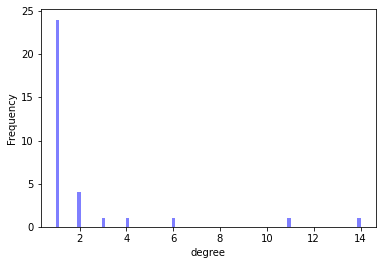

In [9]:
centrality_histogram(G,100,'blue',0.5,'degree')

In [10]:
average_degree=2.*G.number_of_edges()/G.number_of_nodes() # why?!

print (average_degree)

2.121212121212121


In [11]:
# what are the min and max values?
degree_list=[]
for i in G.nodes():
    degree_list.append(G.degree(i))
    
degree_list=sorted(degree_list)

print ("min value= ",degree_list[0])
print ('max value= ', degree_list[-1])

min value=  1
max value=  14


In [12]:
variance=0.
for i in degree_list:
    variance+=(i-average_degree)**2/(G.number_of_nodes())
    

print (variance)

8.167125803489439


In [13]:
degree_array=np.zeros(G.number_of_nodes(),float)
counter=0
for i in G.nodes():
    degree_array[counter]=G.degree(i)
    counter+=1
    
print ("Average Degree =",degree_array.mean())
print ("Variance =", degree_array.std()**2.)

Average Degree = 2.121212121212121
Variance = 8.16712580348944


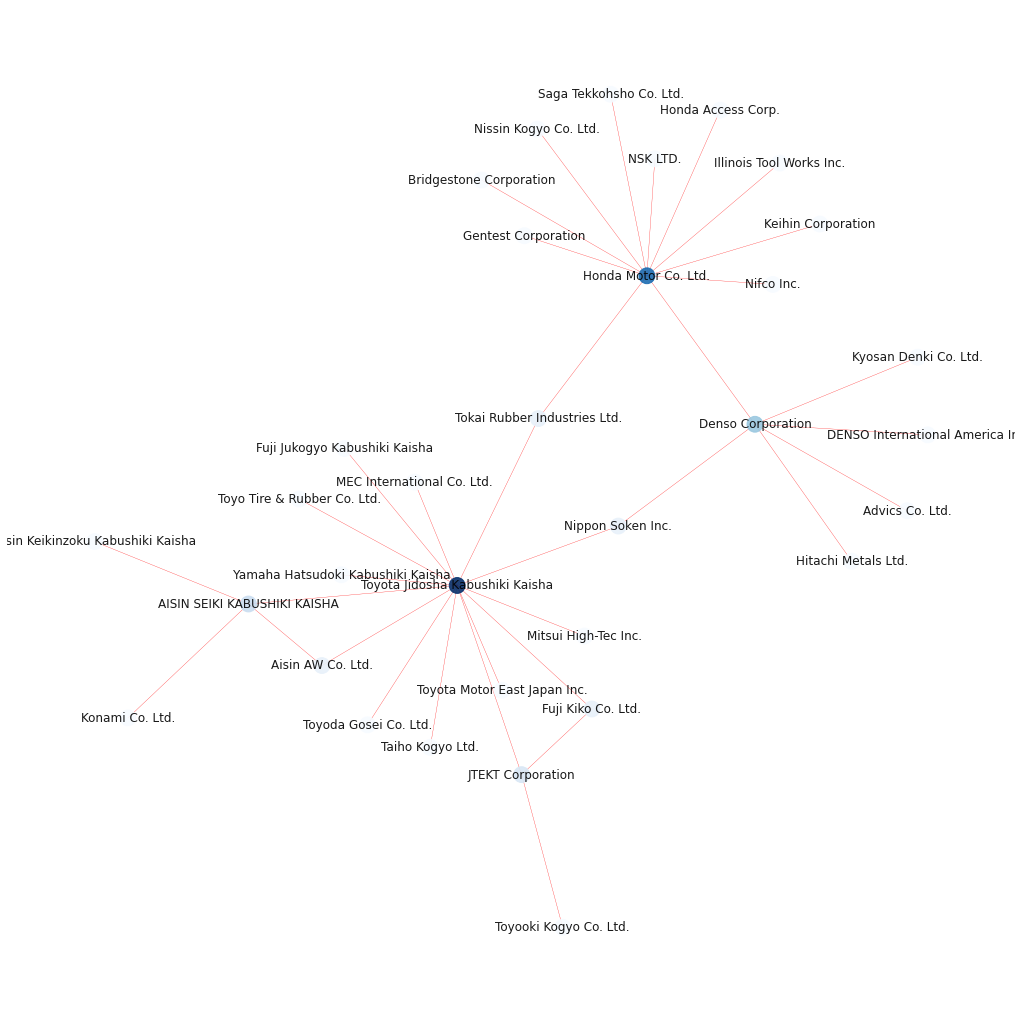

In [33]:
# let's plot the network considering the degree as nodes' attribute

code_color=[]
for i in G.nodes():
    code_color.append(G.degree(i))

plt.figure(1,figsize=(14,14))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.kamada_kawai_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Red",cmap='Blues'
        ,node_color=code_color,labels=ids_label,font_size=12)

In [15]:
a=open("data/USPTO_2012_5_proj_attributes_NEW.csv","r",encoding='latin1')
for i in a:
    n=i.strip().split(",")
    print (n)
a.close()

['ID', 'Patent_industry', 'University', 'Patent_count', 'Turnover_lay', 'Turnover_2012', 'Total_assets_2012', 'Employees_2012', 'R&D_2012', 'Country_code']
['Bridgestone Corporation', '5', '0', '672', '32271274', '35121178', '35115551', '143448', '956684', '4']
['Denso Corporation', '5', '0', '20118', '48105196', '38034234', '42263337', '132276', '3563038', '4']
['AISIN SEIKI KABUSHIKI KAISHA', '5', '0', '2214', '302352', '0', '0', '0', '0', '4']
['Aisin AW Co. Ltd.', '5', '0', '1246', '13036274', '0', '0', '0', '0', '4']
['Toyota Jidosha Kabushiki Kaisha', '5', '0', '9120', '276669260', '234351491', '376880705', '333498', '8576251', '4']
['Honda Motor Co. Ltd.', '5', '0', '8143', '144657174', '104917126', '144825890', '190338', '5950823', '4']
['Advics Co. Ltd.', '5', '0', '128', '2103944', '0', '0', '0', '0', '4']
['Nippon Soken Inc.', '5', '0', '374', '0', '0', '0', '0', '0', '4']
['JTEKT Corporation', '5', '0', '490', '13571616', '11338567', '10907414', '41714', '386139', '4']
['Ke

In [16]:
a=open('data/USPTO_2012_5_proj_attributes_NEW.csv','r',encoding='latin1')
c=0
for i in a:
    n=i.strip().split(",")
    if c>0:  # we need to skip the first line
        id_node=n[0]
        Patent_industry=n[1]
        University=n[2]
        Patent_count=float(n[3])
        Turnover_lay=float(n[4])
        Turnover_2012=float(n[5])
        Total_assets_2012=float(n[6])
        Employees_2012=float(n[7])
        RD_2012=float(n[8])
        Country_code=int(n[9])
    
        # let's store in memory some info
        G.nodes[id_node]['Turnover_2012']=Turnover_2012
        G.nodes[id_node]['Total_assets_2012']=Total_assets_2012
        G.nodes[id_node]['RD_2012']=RD_2012
        G.nodes[id_node]['Employees_2012']=Employees_2012
        
    c+=1
a.close()

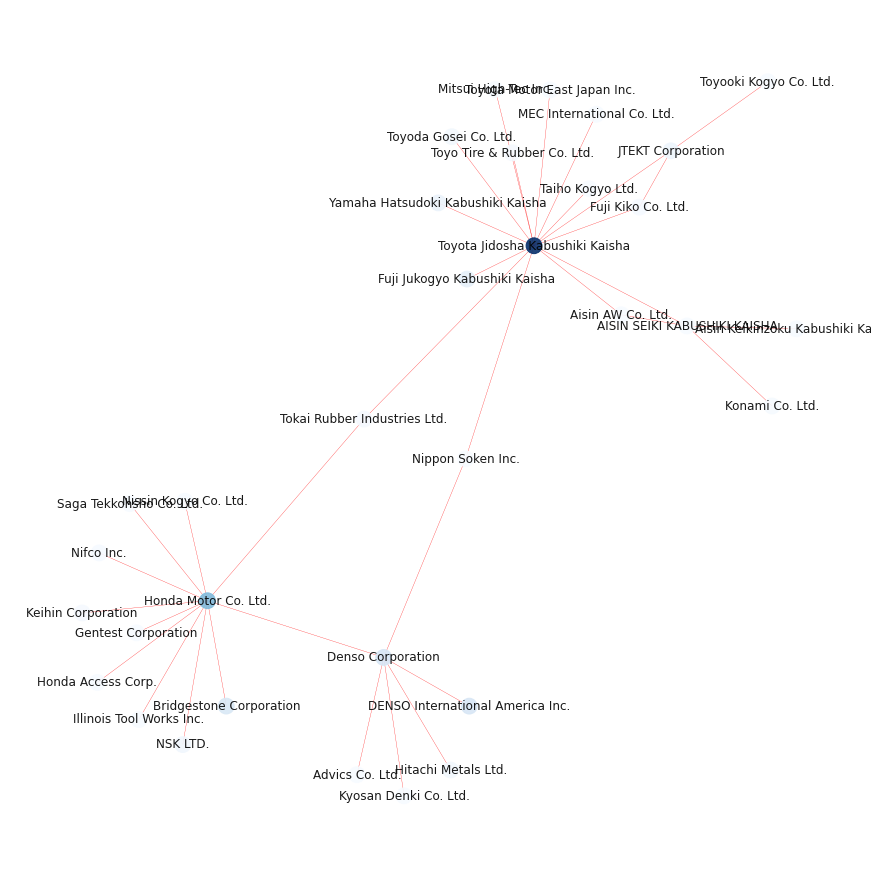

In [27]:
# let's plot the network showing the revenue as attribute

code_color=[]
for i in G.nodes():
    code_color.append(G.nodes[i]['Turnover_2012'])
    
ids_label={} # this dictionary is needed to show the node ids
for i in G.nodes():
    ids_label[i]=str(i)

plt.figure(1,figsize=(10,10))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Red",cmap='Blues'
        ,node_color=code_color,labels=ids_label,font_size=12)

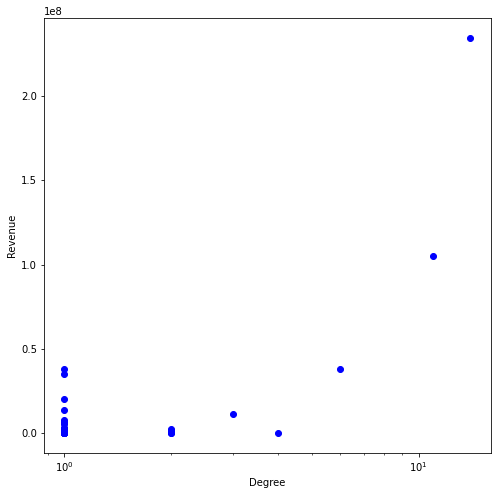

In [28]:
# what do we learn?

# let's study the correlation with the degree
# let's start with the scatter plot

x=[]
y=[]
for i in G.nodes():
    x.append(G.degree(i))
    y.append(G.nodes[i]['Turnover_2012'])  # x and y contain the list of degree and number of employees for each node
    
plt.figure(1,figsize=(8,8))
    
# we can just directly plot the scatter plot
plt.scatter(x,y,marker='o',color='Blue')
plt.xlabel('Degree')
plt.ylabel('Revenue')
plt.xscale('log')
plt.show()


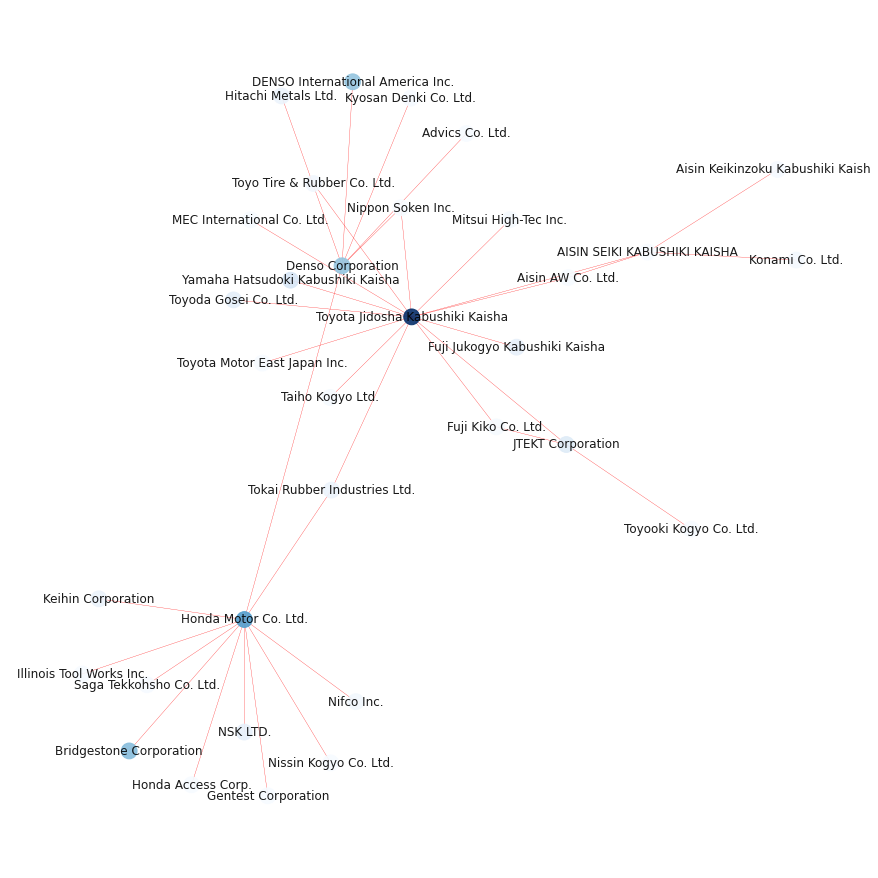

In [29]:
# let's plot the network showing the revenue as attribute

code_color=[]
for i in G.nodes():
    code_color.append(G.nodes[i]['Employees_2012'])

plt.figure(1,figsize=(12,12))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Red",cmap='Blues'
        ,node_color=code_color,labels=ids_label,font_size=12)

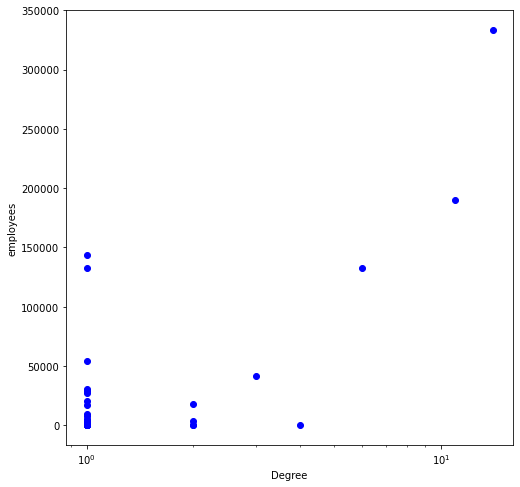

In [30]:
# what do we learn?

# let's study the correlation with the degree
# let's start with the scatter plot

x=[]
y=[]
for i in G.nodes():
    x.append(G.degree(i))
    y.append(G.nodes[i]['Employees_2012'])  # x and y contain the list of degree and number of employees for each node
    
plt.figure(1,figsize=(8,8))
    
# we can just directly plot the scatter plot
plt.scatter(x,y,marker='o',color='Blue')
plt.xlabel('Degree')
plt.ylabel('employees')
plt.xscale('log')
plt.show()

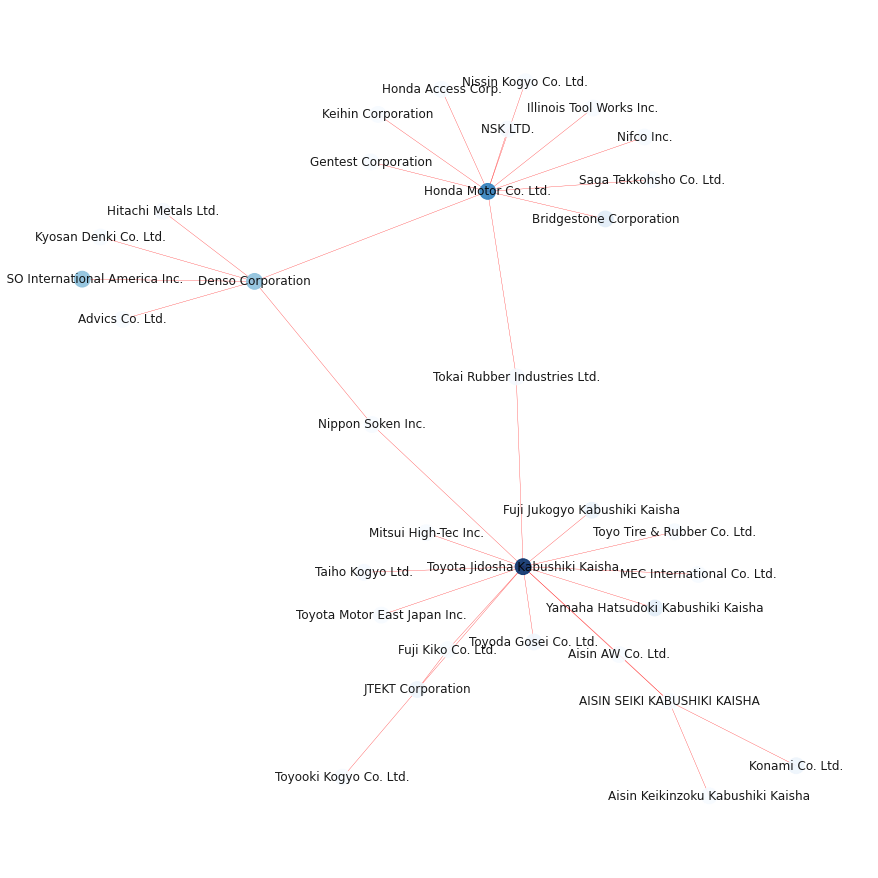

In [31]:
# let's plot the network showing the revenue as attribute

code_color=[]
for i in G.nodes():
    code_color.append(G.nodes[i]['RD_2012'])

plt.figure(1,figsize=(12,12))  # we use this command to make sure we are able to see the network

nx.draw(G, pos=nx.spring_layout(G),
        alpha=0.9,node_size=250,
        width=0.3,edge_color="Red",cmap='Blues'
        ,node_color=code_color,labels=ids_label,font_size=12)

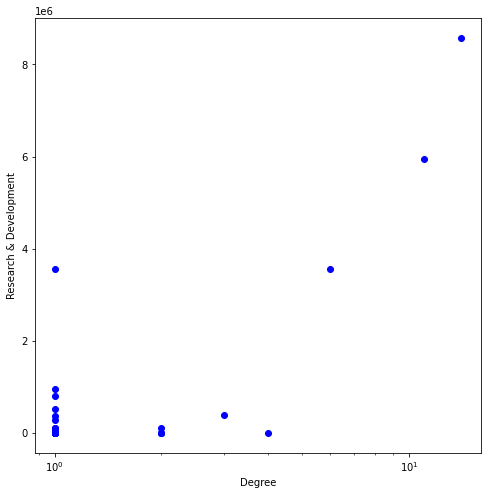

In [32]:
# what do we learn?

# let's study the correlation with the degree
# let's start with the scatter plot

x=[]
y=[]
for i in G.nodes():
    x.append(G.degree(i))
    y.append(G.nodes[i]['RD_2012'])  # x and y contain the list of degree and number of employees for each node
    
plt.figure(1,figsize=(8,8))
    
# we can just directly plot the scatter plot
plt.scatter(x,y,marker='o',color='Blue')
plt.xlabel('Degree')
plt.ylabel('Research & Development')
plt.xscale('log')
plt.show()